In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
retailer_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/929fe498-1032-4ad6-997e-e3c8c33853ea/Online+Retail.csv', encoding = "ISO-8859-1")
retailer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.00,United Kingdom


In [34]:
retailer_data.shape

(541909, 8)

In [35]:
retailer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [36]:
retailer_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [37]:
# TODO: 
# Drop null values
# RFM analysis 
# recencey, Frequency, Monetary analysis
# missing value treatment
# Outlier treatment
# Standardisation of data
# Ttansforming data from order-level to customer-level

#### Missing data value treatment:

In [38]:
pd.options.display.float_format = '{:.2f}'.format

In [39]:
# Drop null values
retailer_data = retailer_data.dropna()
retailer_data.shape

(406829, 8)

In [40]:
retailer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [41]:
retailer_data.InvoiceDate = pd.to_datetime(retailer_data.InvoiceDate, format='%d-%m-%Y %H:%M')

In [46]:
groupby_customer = retailer_data.groupby('CustomerID')

In [91]:
retailer_data['orderAmount'] = retailer_data.UnitPrice * retailer_data.Quantity
monetary = groupby_customer.agg({'orderAmount': ['sum']})
monetary = monetary.reset_index()
monetary.columns = ['CustomerID', 'OrderAmount']
monetary.shape

(4372, 2)

In [92]:
monetary.head()

,CustomerID,OrderAmount
0,12346.00,0.00
1,12347.00,4310.00
2,12348.00,1797.24
3,12349.00,1757.55
4,12350.00,334.40


In [93]:
tmp = groupby_customer.agg({'CustomerID': ['count']})
tmp = tmp.reset_index()
tmp.columns = ['CustomerID', 'frequency']
monetary = monetary.merge(tmp, on='CustomerID', how='inner')
monetary.head()

,CustomerID,OrderAmount,frequency
0,12346.00,0.00,2
1,12347.00,4310.00,182
2,12348.00,1797.24,31
3,12349.00,1757.55,73
4,12350.00,334.40,17


In [94]:
# ===> get the recency
# ===> Fetch latest data from the data and get the max diff of those data set
last_purchased_date =  retailer_data.InvoiceDate.max() + pd.DateOffset(days=1)
retailer_data['last_purchase'] = last_purchased_date - retailer_data.InvoiceDate
last_purchased_data = retailer_data.groupby('CustomerID').last_purchase.min().reset_index()

monetary = monetary.merge(last_purchased_data, how='inner', on='CustomerID')
monetary.head()

,CustomerID,OrderAmount,frequency,last_purchase
0,12346.00,0.00,2,326 days 02:33:00
1,12347.00,4310.00,182,2 days 20:58:00
2,12348.00,1797.24,31,75 days 23:37:00
3,12349.00,1757.55,73,19 days 02:59:00
4,12350.00,334.40,17,310 days 20:49:00


#### Outlier treatment:

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2677b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25cf55f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a266aca20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25cf5860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25cf5898>],
 'means': []}

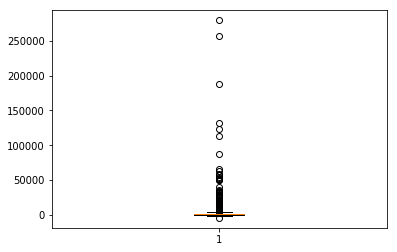

In [95]:
plt.boxplot(monetary.OrderAmount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25c0d5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25c0dc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25c0d1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25bf3358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25bf36a0>],
 'means': []}

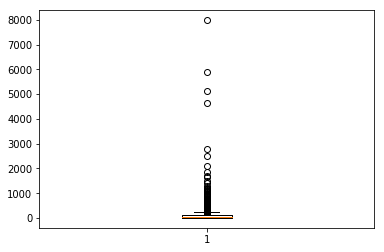

In [96]:
plt.boxplot(monetary.frequency)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a266b8f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25bbf438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a266b8ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2669f0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ebe9f98>],
 'means': []}

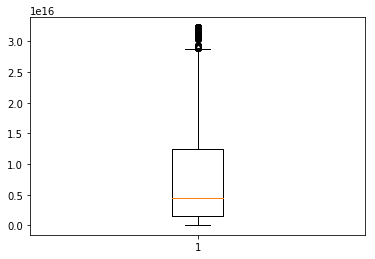

In [97]:
plt.boxplot(monetary.last_purchase)

In [98]:
monetary.describe()

,CustomerID,OrderAmount,frequency,last_purchase
count,4372.00,4372.00,4372.00,4372
mean,15299.68,1898.46,93.05,92 days 13:37:53.302836
std,1722.39,8219.35,232.47,100 days 18:30:05.700066
min,12346.00,-4287.63,1.00,1 days 00:00:00
25%,13812.75,293.36,17.00,17 days 03:20:30
50%,15300.50,648.08,42.00,50 days 20:53:30
75%,16778.25,1611.72,102.00,143 days 21:28:30
max,18287.00,279489.02,7983.00,374 days 02:57:00


In [99]:
q1 = monetary.OrderAmount.quantile(0.25)
q3 = monetary.OrderAmount.quantile(0.75)
quartile = 1.5 * (q3 - q1)
monetary = monetary[ (monetary.OrderAmount < (q3 + quartile)) & (monetary.OrderAmount > (q1 - quartile)) ]

In [100]:
monetary.describe()

,CustomerID,OrderAmount,frequency,last_purchase
count,3949.00,3949.00,3949.00,3949
mean,15334.07,855.14,61.93,99 days 23:48:47.814636
std,1707.14,813.94,77.10,102 days 11:35:41.169951
min,12346.00,-1592.49,1.00,1 days 00:00:00
25%,13866.00,264.62,16.00,21 days 21:23:00
50%,15347.00,567.36,35.00,57 days 23:06:00
75%,16803.00,1201.49,81.00,158 days 00:39:00
max,18287.00,3580.13,977.00,374 days 02:57:00


In [101]:
q1 = monetary.frequency.quantile(0.25)
q3 = monetary.frequency.quantile(0.75)
quartile = 1.5 * (q3 - q1)
monetary = monetary[ (monetary.frequency < (q3 + quartile)) & (monetary.frequency > (q1 - quartile)) ]
monetary.describe()

,CustomerID,OrderAmount,frequency,last_purchase
count,3697.00,3697.00,3697.00,3697
mean,15307.52,771.36,46.66,104 days 19:06:29.797132
std,1717.43,740.65,41.71,103 days 19:11:58.000039
min,12346.00,-1592.49,1.00,1 days 00:00:00
25%,13822.00,248.10,15.00,23 days 02:41:00
50%,15308.00,508.46,32.00,61 days 04:27:00
75%,16784.00,1046.56,68.00,170 days 03:42:00
max,18287.00,3563.85,178.00,374 days 02:57:00


In [102]:
q1 = monetary.last_purchase.quantile(0.25)
q3 = monetary.last_purchase.quantile(0.75)
quartile = 1.5 * (q3 - q1)
monetary = monetary[ (monetary.last_purchase < (q3 + quartile)) & (monetary.last_purchase > (q1 - quartile)) ]
monetary.describe()

,CustomerID,OrderAmount,frequency,last_purchase
count,3697.00,3697.00,3697.00,3697
mean,15307.52,771.36,46.66,104 days 19:06:29.797132
std,1717.43,740.65,41.71,103 days 19:11:58.000039
min,12346.00,-1592.49,1.00,1 days 00:00:00
25%,13822.00,248.10,15.00,23 days 02:41:00
50%,15308.00,508.46,32.00,61 days 04:27:00
75%,16784.00,1046.56,68.00,170 days 03:42:00
max,18287.00,3563.85,178.00,374 days 02:57:00


In [111]:
monetary.last_purchase = monetary.last_purchase.dt.days

#### Scaling: 

In [106]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(monetary.drop('CustomerID', axis=1))
rfm_data = pd.DataFrame(scaled_data)
rfm_data.columns = ['Frequency','Amount','Recency']
rfm_data.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Frequency,Amount,Recency
0,-1.04,-1.07,2.14
1,1.39,-0.38,-0.28
2,1.33,0.63,-0.82
3,-0.59,-0.71,1.98
4,1.05,1.16,-0.66


### Modeling:

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [118]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [122]:
cluster = KMeans(n_clusters=3, max_iter=50)
cluster.fit(rfm_data)
silhouette_score(rfm_data, cluster.labels_)

0.4398842256915348

#### Hopkins statistics: 

refer https://www.datanovia.com/en/lessons/assessing-clustering-tendency/ for more details

In [123]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [129]:
def hopkins(_data):
    _columns = _data.shape[1]
    rows_count = len(_data)
    m = int(0.1 * rows_count)
    random_data = sample(range(1, rows_count, 1), m)
    nbrs = NearestNeighbors(n_neighbors=1).fit(_data.values)
    data_hopkkins, random_hopkins = [], []
    
    for i in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(_data, axis=0),np.amax(_data, axis=0), _columns).reshape(1, -1), 2, return_distance=True)
        random_hopkins.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(_data.iloc[random_data[i]].values.reshape(1, -1), 2, return_distance=True)
        data_hopkkins.append(w_dist[0][1])
    
    H = sum(random_hopkins) / (sum(random_hopkins) + sum(data_hopkkins))
    return H

hopkins(rfm_data)

0.8925391463174694

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ represents mean inter distance b/w neighbour cluster

$q$ represents mean intra distance within the cluster
* Value will be between 1 to -1
* Value 1 represents $p$ is max and q minimum which is data is well clustered and very similar
* Value -1 represents $q$ is data is uniformaly distributed

In [133]:
silhouette_data = []
for k in range(2, 20):
    _cluster = KMeans(n_clusters=k)
    _cluster.fit(rfm_data)
    silhouette_data.append(silhouette_score(rfm_data, _cluster.labels_))

silhouette_data

[0.4292946797663935,
 0.4398069826782572,
 0.40851721359807264,
 0.38861188085514137,
 0.35657830353396364,
 0.33220050611569624,
 0.3411560444456715,
 0.34907412711066277,
 0.3532152458233529,
 0.3205958524844561,
 0.3044019884996085,
 0.30913125816834114,
 0.29633841404886146,
 0.3039757587002189,
 0.3099756688747185,
 0.3115558692213504,
 0.2919383765309293,
 0.29463453649154603]

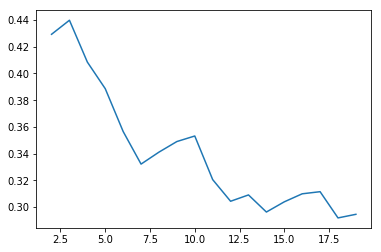

In [140]:
plt.plot(range(2,20), silhouette_data)

### Sum of squared distances: 

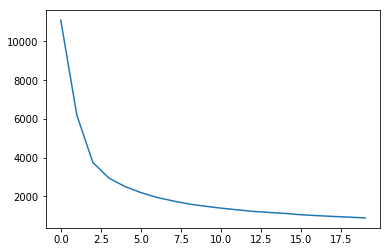

In [142]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(rfm_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [145]:
model_clus5 = KMeans(n_clusters=5, max_iter=50)
model_clus5.fit(rfm_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [149]:
rfm_data.head()

,Frequency,Amount,Recency
0,-1.04,-1.07,2.14
1,1.39,-0.38,-0.28
2,1.33,0.63,-0.82
3,-0.59,-0.71,1.98
4,1.05,1.16,-0.66


In [152]:
rfm_data.head()

,Frequency,Amount,Recency
0,-1.04,-1.07,2.14
1,1.39,-0.38,-0.28
2,1.33,0.63,-0.82
3,-0.59,-0.71,1.98
4,1.05,1.16,-0.66


In [175]:
monetary.reset_index(drop=True, inplace=True)

In [176]:
RFM_km = pd.concat([monetary, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

# RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [177]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,23.26,356.19,57.82
1,1,114.13,913.69,54.12
2,2,117.60,2472.90,38.37
3,3,20.60,327.63,262.74
4,4,53.69,1195.98,49.96


In [178]:
RFM_km.shape

(3697, 5)

In [179]:
monetary.shape

(3697, 4)

In [180]:
monetary.head()

,CustomerID,OrderAmount,frequency,last_purchase
0,12346.00,0.00,2,326
1,12348.00,1797.24,31,75
2,12349.00,1757.55,73,19
3,12350.00,334.40,17,310
4,12352.00,1545.41,95,36


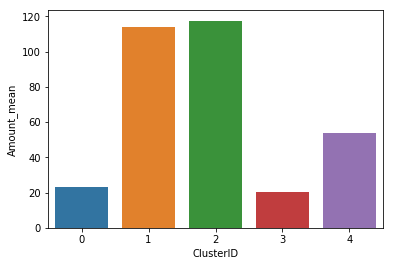

In [181]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

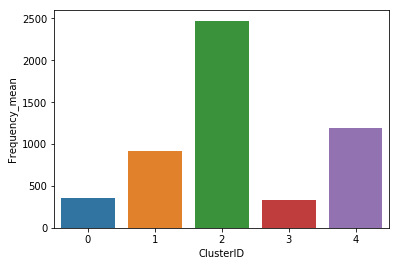

In [182]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

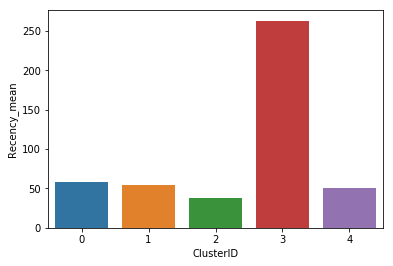

In [183]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

## Heirarchical Clustering

In [185]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

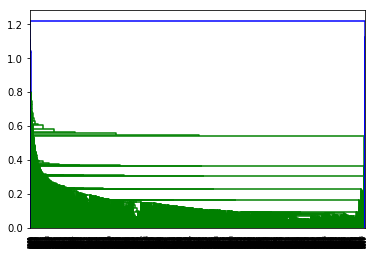

In [188]:
mergings = linkage(rfm_data, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

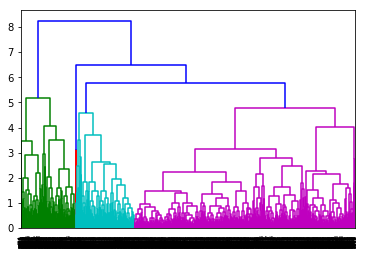

In [189]:
mergings = linkage(rfm_data, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [191]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([monetary, clusterCut], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [193]:
km_clusters_amount = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Recency.mean())

In [194]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,23.93,401.83,131.07
1,1,44.94,1787.15,38.55
2,2,122.15,2324.57,34.86
3,3,89.74,915.36,65.75
4,4,6.14,-997.15,218.29


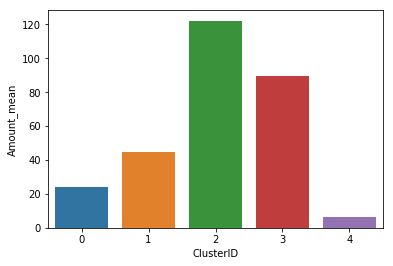

In [195]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

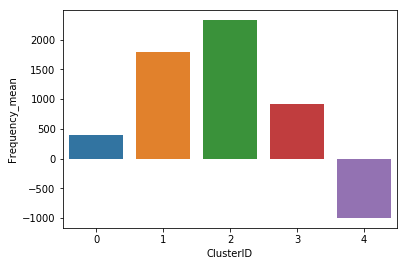

In [196]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

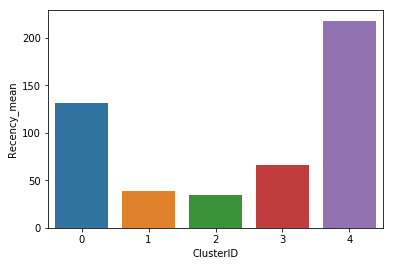

In [197]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [1]:
from kmodes.kmodes import KModes